# Stockchart
This notebook pulls stock data and builds stock charts.

---

Made by [@samkwok01](https://twitter.com/samkwok01), who happens to be a VC (would love to see what you are building!)


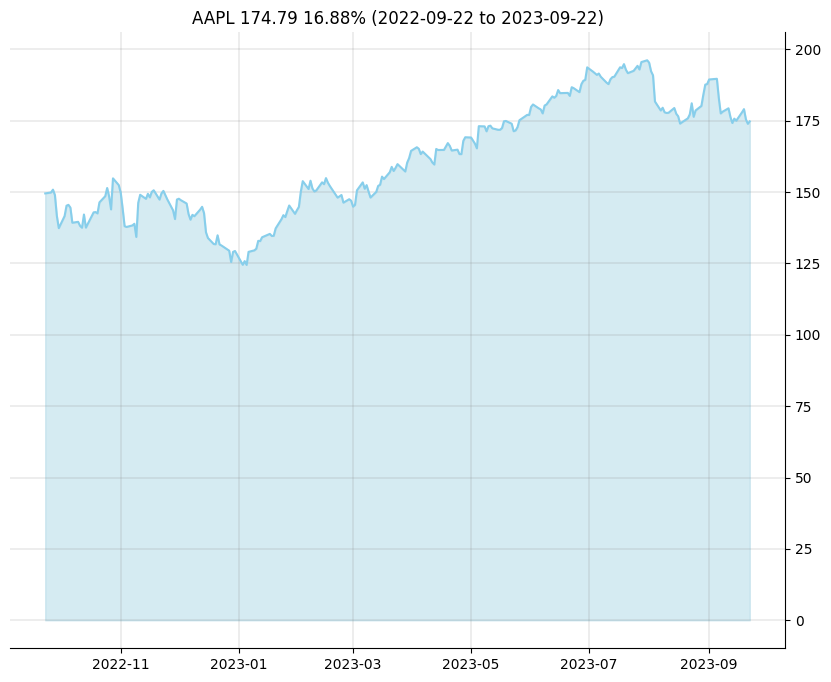

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt

# Define the ticker symbol for the stock you want to fetch
tickerSymbol = 'AAPL'

# Fetch the data for the last year with daily frequency
tickerData = yf.Ticker(tickerSymbol)
start_date = dt.datetime.now() - dt.timedelta(days=365)
end_date = dt.datetime.now()
tickerDf = tickerData.history(start=start_date, end=end_date, interval='1d')

# Calculate the percentage change
percent_change = round(
  (tickerDf.iloc[-1]['Close'] - tickerDf.iloc[0]['Close']) /
  tickerDf.iloc[0]['Close'] * 100, 2)

# Plot a line chart of the stock price movement
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(tickerDf.index, tickerDf['Close'], linestyle='-', color='skyblue')
ax.fill_between(tickerDf.index,
                tickerDf['Close'],
                linestyle='-',
                color='lightblue',
                alpha=0.5,
                label='Area Chart')
ax.set_title(
  f'{tickerSymbol} {round(tickerDf.iloc[-1]["Close"], 2)} {percent_change}% ({start_date.date()} to {end_date.date()})'
)

ax.grid(which='major', color='gray', linewidth=0.2)
ax.grid(which='minor', color='lightgray', linestyle='--', linewidth=0.2)

# Move the y-axis ticks and labels to the right side
ax.yaxis.tick_right()

# Show frame lines only on right and bottom sides
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.show()